In [52]:
from clustimage import Clustimage
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import PIL
import os
from numpy import nan
import numpy as np
import random
import pandas as pd

In [15]:
# allow multiple output per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output

print("Multiple outputs per cell")

Multiple outputs per cell


In [2]:
path = 'C:/Users/samee/Downloads/Saturated-Binary-Single/Train/TrainPA'

In [11]:
# for disease in os.listdir(path):
#     arr = random.sample(os.listdir(path + '/' + disease), 366)
#     for i in arr:
#         og = os.path.join(path, disease, i)
#         final = os.path.join(path[:55], disease[:2], i)
#         os.rename(og, final)

# for disease in os.listdir(path):
#     if disease == 'No Finding' or disease == 'Pneumonia':
#         for file in os.listdir(os.path.join(path, disease)):
#             os.rename(os.path.join(path, disease, file), os.path.join(path, disease[:2], file))

# for disease in os.listdir(path):
#     if len(os.listdir(os.path.join(path, disease))) < 466:
#         os.rename(os.path.join(path, disease), os.path.join(path[:54], disease))

# for disease in os.listdir(path):
#     if not os.path.exists(os.path.join(path, disease + ' 2.0')):
#         os.makedirs(os.path.join(path, disease + ' 2.0'))
#     sam = random.sample(os.listdir(os.path.join(path, disease)), 466)
#     for file in os.listdir(os.path.join(path, disease)):
#         if file not in sam:
#             os.rename(os.path.join(path, disease, file), os.path.join(path, disease + ' 2.0', file))

# for disease in os.listdir(path):
#     if '2.0' in disease:
#         os.rename(os.path.join(path, disease), os.path.join(path[:54], "2.0's", disease))

In [3]:
cl = Clustimage(method = 'pca', embedding='tsne', dim = (224, 224), grayscale = True, params_pca={'n_components': 50})

In [4]:
pathnames = []
for disease in os.listdir(path):
    for file in os.listdir(os.path.join(path, disease)):
        pathnames.append(os.path.join(path, disease, file))

In [5]:
results = cl.fit_transform(pathnames)

[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
100%|██████████| 4660/4660 [00:11<00:00, 423.56it/s]
[clustimage] >INFO> Extracting features using method: [pca]


[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed on the [50176] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.


[clustimage] >INFO> Extracted features using [pca]: samples=4660, features=50
[clustimage] >INFO> Compute [tsne] embedding


[pca] >Compute explained variance.


[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:09<00:00,  2.29it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (4660, 50) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [3].
[clusteval] >Fin.


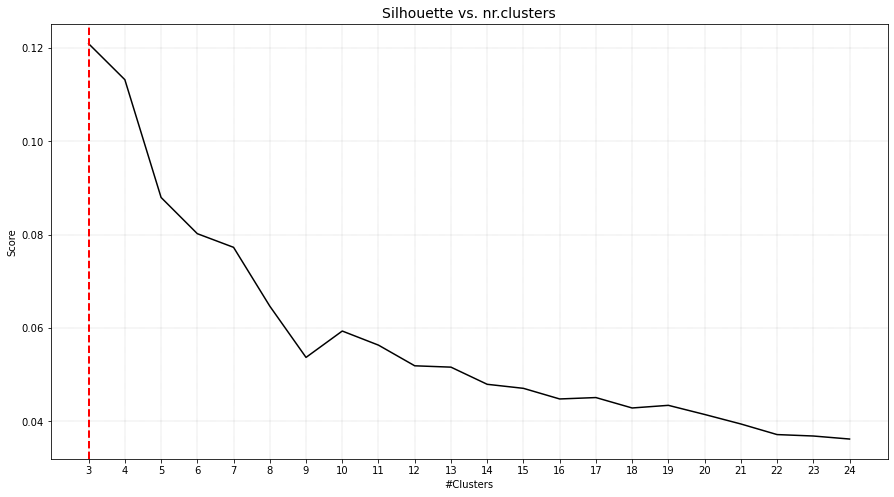

[clusteval] >Estimated number of n_clusters: 3, average silhouette_score=0.264


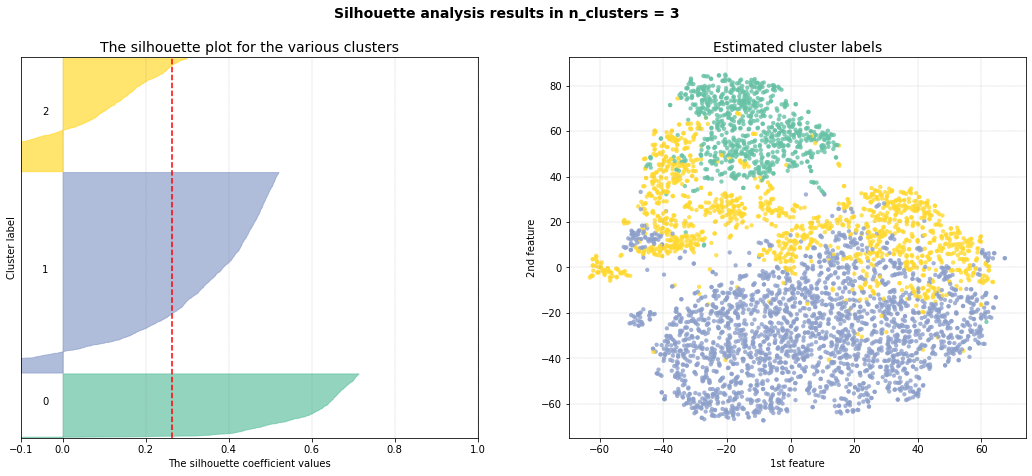

(<Figure size 1296x504 with 2 Axes>,
 <AxesSubplot:title={'center':'The silhouette plot for the various clusters'}, xlabel='The silhouette coefficient values', ylabel='Cluster label'>,
 <AxesSubplot:title={'center':'Estimated cluster labels'}, xlabel='1st feature', ylabel='2nd feature'>)

In [6]:
cl.clusteval.plot()
cl.clusteval.scatter(cl.results['xycoord'])

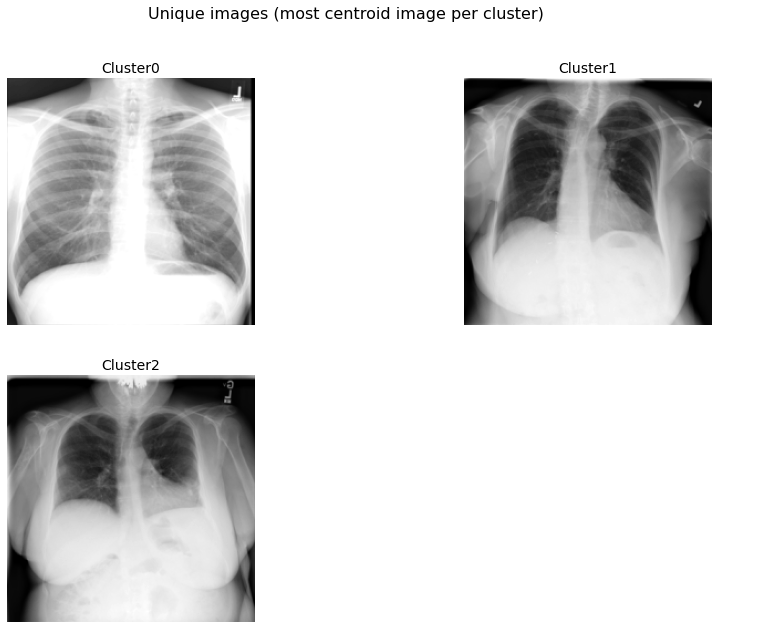

In [7]:
cl.plot_unique(img_mean=False)

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

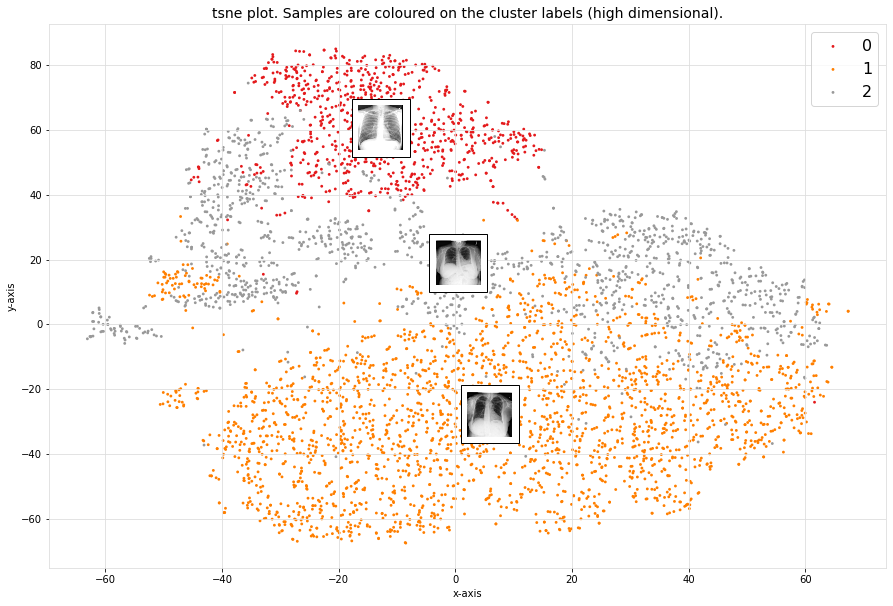

In [8]:
cl.scatter(dotsize=8, zoom=0.2, img_mean=False)

In [30]:
x = 0
values = pd.DataFrame(columns = [0, 1, 2])
files = pd.DataFrame(columns = [0, 1, 2])
while x < len(results['filenames']):
    name = results['filenames'][x]
    index = name.index(' ')
    disease = name[:index]

    whichCluster = results['labels'][x]

    path = results['pathnames'][x]

    values = values.append({whichCluster: disease}, ignore_index=True)
    files = files.append({whichCluster: path}, ignore_index=True)
    x += 1

In [ ]:
values[1].value_counts()
values[2].value_counts()
values[0].value_counts()

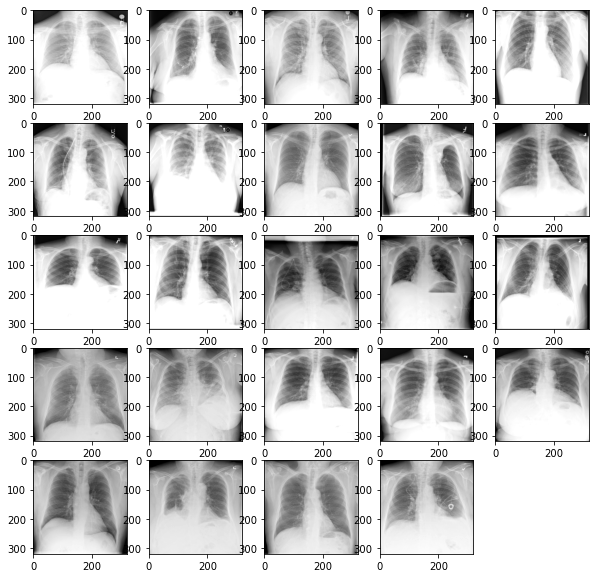

In [61]:
plt.figure(figsize=(10,10))
x = 1
for path in files[0].tolist():
    if x == 25:
        break
    if 'C' in str(path):
        img = PIL.Image.open(str(path))
        img = img.convert('L')
        plt.subplot(5,5, x)
        plt.imshow(img, cmap = 'gray')
        x += 1
clear_output()
plt.show()

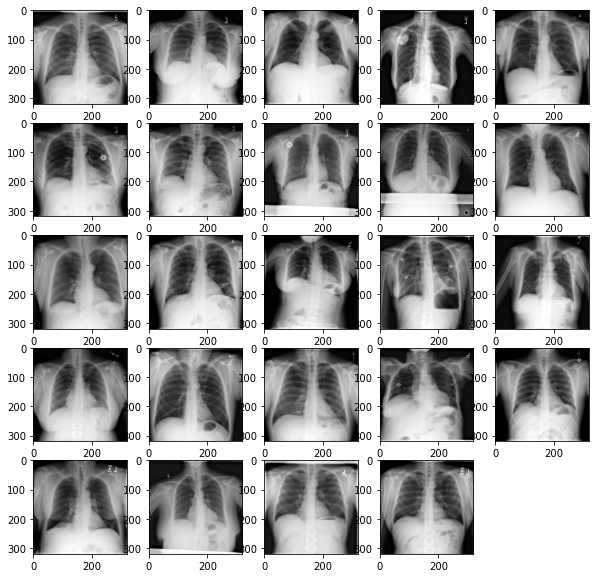

In [62]:
plt.figure(figsize=(10,10))
x = 1
for path in files[1].tolist():
    if x == 25:
        break
    if 'C' in str(path):
        img = PIL.Image.open(str(path))
        img = img.convert('L')
        plt.subplot(5,5, x)
        plt.imshow(img, cmap = 'gray')
        x += 1
clear_output()
plt.show()

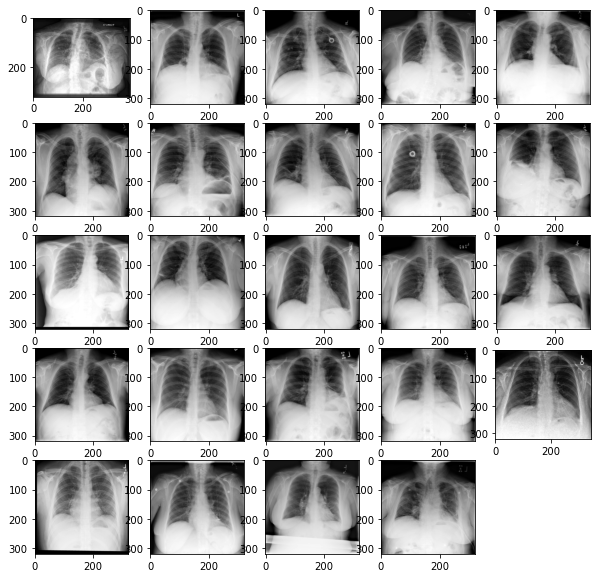

In [63]:
plt.figure(figsize=(10,10))
x = 1
for path in files[2].tolist():
    if x == 25:
        break
    if 'C' in str(path):
        img = PIL.Image.open(str(path))
        img = img.convert('L')
        plt.subplot(5,5, x)
        plt.imshow(img, cmap = 'gray')
        x += 1
clear_output()
plt.show()